<a href="https://colab.research.google.com/github/leebio/bio/blob/main/Midterm_Project_%5B%EC%9D%B4%EB%B9%84%EC%98%A4%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Project

## Describe Your Dataset

### URL: https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data/data

### Task:
환자의 정보(나이) 및 검사수치 데이터 등을 활용하여

갑상선 질환에 대한 진단

### Datasets
thyroidDf 데이터세트는 UCI Machine Learning Repository에서 제공한 갑상선 질환 데이터세트를 조정하여 생성

파일 : thyroidDF.csv- 9,172개 관측치 x 31개 속성

관측치 중 일부를 제외하고, 7,675개의 관측치를 3개의 셋으로 나눔
*   Train dataset: 4,000 개의 환자 정보
*   Validation dataset: 1,000 개의 환자 정보
*   Test dataset:2,675개의 환자 정보

31개 속성에 대한 설명

1. 나이 - 환자의 나이 (int)

2. 성별 - 성별 환자 식별 (str)

3. on_thyroxine - 환자가 티록신을 사용하고 있는지 여부 (bool)

4. 티록신에 대한 쿼리 - *환자가 티록신을 복용하고 있는지 여부 (bool)

5. 항갑상선 약 복용 - 환자가 항갑상선 약을 복용하고 있는지 여부 (bool)

6. sick - 환자가 아픈지 여부 (bool)

7. 임신 - 환자가 임신했는지 여부 (bool)

8. 갑상선_수술 - 환자가 갑상선 수술을 받았는지 여부 (bool)

9. I131_treatment - 환자가 I131 치료를 받고 있는지 여부 (bool)

10. query_hypothyroid - 환자가 갑상선 기능 저하증이 있다고 믿는지 여부 (bool)

11. query_hyperthyroid - 환자가 자신에게 갑상선 기능항진증이 있다고 믿는지 여부 (bool)

12. 리튬 - 환자 여부 * 리튬 (bool)

13. goitre - 환자에게 갑상선종이 있는지 여부 (bool)

14. 종양 - 환자에게 종양이 있는지 여부 (bool)

15. 뇌하수체하수체 - 환자 여부 * 뇌하수체상수체 (float)

16. 정신 - 환자 여부 * 정신 (bool)

17. TSH_measured - TSH가 혈액에서 측정되었는지 여부 (bool)

18. TSH - 실험실 작업에서 나온 혈액 내 TSH 수준 (float)

19. T3_measured - T3가 혈액에서 측정되었는지 여부 (bool)

20. T3 - 실험실 작업으로 인한 혈액 내 T3 수준 (float)

21. TT4_measured - TT4가 혈액에서 측정되었는지 여부 (bool)

22. TT4 - 실험실 작업으로 인한 혈액 내 TT4 수준 (float)

23. T4U_measured - T4U가 혈액에서 측정되었는지 여부 (bool)

24. T4U - 실험실 작업으로 인한 혈액 내 T4U 수준 (float)

25. FTI_measured - FTI가 혈액에서 측정되었는지 여부 (bool)

26. FTI - 실험실 작업으로 인한 혈액 내 FTI 수준 (float)

27. TBG_measured - TBG가 혈액에서 측정되었는지 여부 (bool)

28. TBG - 실험실 작업에서 나온 혈액 내 TBG 수준 (부동)

29. 추천_소스 - (str)

30. target - 갑상선항진증 의료 진단 (str)

31. Patient_id - 환자의 고유 ID (str)






### Features(x)
심플한 모형 구성을 위해 4개의 속성만 사용함

1. 나이 - 환자의 나이 (int)
2. sick - 환자가 아픈지 여부 (bool)
3. TSH - 실험실 작업에서 나온 혈액 내 TSH 수준 (float)
4. TT4 - 실험실 작업으로 인한 혈액 내 TT4 수준 (float)

### Target(y)

'-' 상태 없음, 'hyperthyroid' (갑상선항진증 상태), 'hypothyroid' (갑상선 기능 저하증), 3가지 형태로 분류를 진행함


- 진단은 진단된 상태를 나타내는 일련의 문자로 구성되어 있음

- 진단 '-'은 설명이 필요한 상태가 없음을 나타냄

- 진단 "X|Y" 형식은 "X와 일치하지만 Y일 가능성이 더 높다"로 해석됨




    Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:
    (갑상선항진증 상태)

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:
    (갑상선 기능 저하증)

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:
    (대체 요법)

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:
    (항갑상선 치료)

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:
    (여러 가지 잡다한)

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones

## Build Your Model

### Data preprocessing

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [58]:
df = pd.read_csv('thyroidDF.csv')

In [59]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


In [61]:
# 나이가 65,000이 넘는 오류 데이타 존재하여 100살 미만으로 제한
df = df[df['age'] < 100]

In [62]:
# 주요 데이타의 분포를 확인 (코랩에서 차트가 잘 보이는데 저장하니 차트가 안보이네요.)
def analysis(my_df, GoGraph=go.Histogram):
  fig = make_subplots(rows=3, cols=2)

  trace0 = GoGraph(x=my_df.TSH, name='TSH')
  trace1 = GoGraph(x=my_df.T3, name='T3')
  trace2 = GoGraph(x=my_df.TT4, name='TT4')
  trace3 = GoGraph(x=my_df.T4U, name='T4U')
  trace4 = GoGraph(x=my_df.age, name='age')
  trace5 = GoGraph(x=my_df.sex, name='Gender')

  fig.append_trace(trace0, 1, 1)
  fig.append_trace(trace1, 1, 2)
  fig.append_trace(trace2, 2, 1)
  fig.append_trace(trace3, 2, 2)
  fig.append_trace(trace4, 3, 1)
  fig.append_trace(trace5, 3, 2)

  fig.update_layout(height=800)
  fig.show()

analysis(df)

In [63]:
# 타겟, 결과값의 분포 (코랩에서 차트가 잘 보이는데 저장하니 차트가 안보이네요.)
target_counts = df['target'].value_counts()
fig = px.bar(x=target_counts.index, y=target_counts.values)
fig.update_layout(xaxis_title='Target', yaxis_title='Count', title='Distribution of Target')
fig.show()

#### target을  3가지("Negative"  , 'Hyperthyroid'  , "Hypothyroid") 분류

In [73]:
## target을  3가지("Negative"  , 'Hyperthyroid'  , "Hypothyroid") 분류로 나누고 나머지 진단은 삭제
df = df[df['target'].isin(['A', 'B', 'C', 'D', 'E',
                           'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', '-'])]

In [74]:
# 4개의 변수(나이, sick, TSH, TT4)만 사용하여 모델링
x = df[['age','sick','TSH','TT4']]
y = df['target']

In [75]:
x.shape,  y.shape

((7675, 4), (7675,))

In [76]:
y.unique()

array(['-', 'F', 'AK', 'G', 'A', 'C|I', 'H|K', 'D', 'GK', 'FK', 'B', 'GI',
       'C', 'GKJ', 'D|R', 'E'], dtype=object)

In [77]:
## target을 3가지를 - "Negative" = 0 , 'Hyperthyroid' = 1 , "Hypothyroid" = 2 로 맵핑
mapping = {'-':0,
           'A':1,'AK':1,'B':1, 'C':1, 'C|I':1, 'D':1, 'D|R':1,
           'E': 2, 'F': 2, 'FK': 2, "G": 2, "GK": 2, "GI": 2, 'GKJ': 2, 'H|K': 2,
          }
y = y.map(mapping)

In [78]:
y.unique()

array([0, 2, 1])

In [79]:
x['sick'].unique()

array(['f', 't'], dtype=object)

In [ ]:
# 아프지 않으면 0, 아프면 1로 데이터 변경
x['sick'] = [0 if i == 'f' else 1 for i in x['sick']]

In [81]:
x['sick'].unique()

array([0, 1])

In [82]:
y = np.array(y)

In [83]:
# NaN 비어있는 데이터를 0으로 채움
x = x.fillna(0)

In [84]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7675.0,52.013029,18.654684,1.0,37.00,55.0,67.0,97.0
sick,7675.0,0.037394,0.189738,0.0,0.00,0.0,0.0,1.0
TSH,7675.0,4.984266,24.781636,0.0,0.25,1.2,2.5,530.0
TT4,7675.0,100.624711,39.201796,0.0,84.00,101.0,120.0,430.0


In [85]:
x.shape, y.shape

((7675, 4), (7675,))

In [86]:
x = x.to_numpy()

### Split Data: Train data, Test Data

In [87]:
## 우선 train data 5,000개, test data 2,675개로 나눔
train_len = 5000
train_idxs = np.random.choice(len(x), train_len, replace=False)
test_idxs = [idx for idx in range(len(x)) if idx not in train_idxs]
train_x = x[train_idxs]
train_y = y[train_idxs]
test_x = x[test_idxs]
test_y = y[test_idxs]

In [88]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((5000, 4), (5000,), (2675, 4), (2675,))

In [89]:
## 다시 train data를 train data 4,000개, validate data 1,000개로 나눔
train_len = 4000
train_idxs = np.random.choice(len(train_x), train_len, replace=False)
val_idxs = [idx for idx in range(len(train_x)) if idx not in train_idxs]
train_x = x[train_idxs]
train_y = y[train_idxs]
val_x = x[val_idxs]
val_y = y[val_idxs]

In [90]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((4000, 4), (4000,), (1000, 4), (1000,))

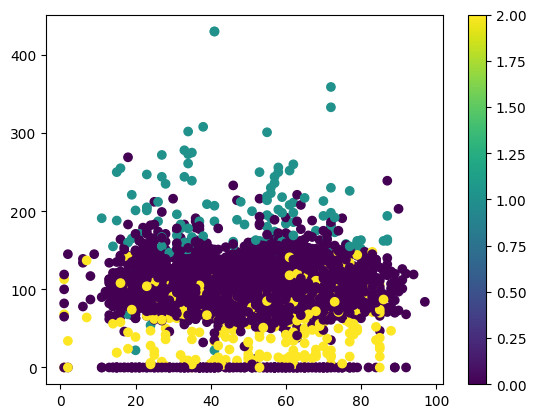

In [91]:
# train data의 age와 TT4의 수치를 도식화
plt.scatter(train_x[:, 0], train_x[:, 3], c=train_y)
plt.colorbar()
plt.show()

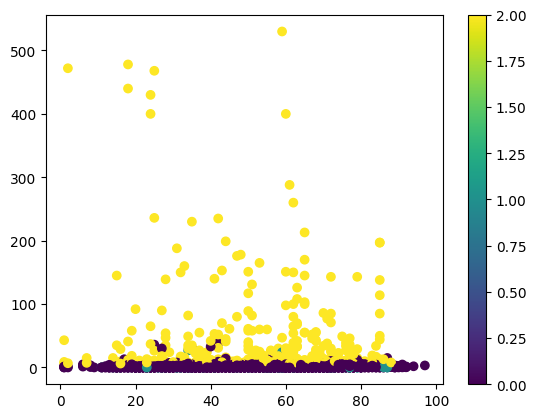

In [92]:
# train data의 age와 TSH의 수치를 도식화
plt.scatter(train_x[:, 0], train_x[:, 2], c=train_y)
plt.colorbar()
plt.show()

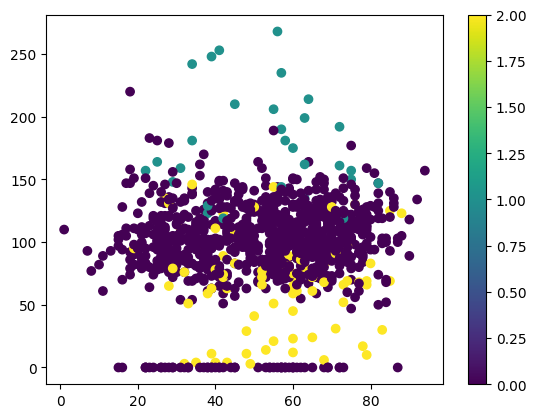

In [93]:
# val data의 나이와 TT4의 수치를 도식화
plt.scatter(val_x[:, 0], val_x[:, 3], c=val_y)
plt.colorbar()
plt.show()

### **Set Models**

#### 3가지 분류 방법(Logistic Regression, Decision Tree, SVC)에서
#### OvO, OvR 방법을 적용하여 총 6개의 모형으로 분류



In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
model_lr_ovr = OneVsOneClassifier(LogisticRegression(fit_intercept=True,
                              solver='lbfgs',
                              random_state=0))
model_df_ovr = OneVsRestClassifier(DecisionTreeClassifier(criterion='gini',
                                  splitter='best', # {“best”, “random”}
                                  max_depth=10,
                                  random_state=0))
model_svc_ovr = OneVsRestClassifier(SVC(C=1.0, kernel='rbf', gamma='scale'))
model_lr_ovo = OneVsOneClassifier(LogisticRegression(fit_intercept=True,
                              solver='lbfgs',
                              random_state=0))
model_df_ovo = OneVsOneClassifier(DecisionTreeClassifier(criterion='gini',
                                  splitter='best', # {“best”, “random”}
                                  max_depth=10,
                                  random_state=0))
model_svc_ovo = OneVsOneClassifier(SVC(C=1.0, kernel='rbf', gamma='scale'))
models = [model_lr_ovr, model_df_ovr, model_svc_ovr, model_lr_ovo, model_df_ovo, model_svc_ovo]
model_svc_ovo.fit(x, y)
model_svc_ovr.fit(x, y)

OneVsRestClassifier(estimator=SVC())

In [95]:
model_svc_ovr.estimators_, model_svc_ovo.estimators_

([SVC(), SVC(), SVC()], (SVC(), SVC(), SVC()))

#### Train

In [96]:
def accuracy(pre, y):
    return sum(pre==y)/len(y)

In [97]:
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    acc = accuracy(pre, train_y)
    print(model, acc)

OneVsOneClassifier(estimator=LogisticRegression(random_state=0)) 0.958
OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                     random_state=0)) 0.99625
OneVsRestClassifier(estimator=SVC()) 0.9415
OneVsOneClassifier(estimator=LogisticRegression(random_state=0)) 0.958
OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=0)) 0.995
OneVsOneClassifier(estimator=SVC()) 0.9415


#### Validate

In [98]:
for model in models:
#   model.fit(val_x, val_y)
    pre = model.predict(val_x)
    acc = accuracy(pre, val_y)
    print(model, acc)

OneVsOneClassifier(estimator=LogisticRegression(random_state=0)) 0.962
OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                     random_state=0)) 0.969
OneVsRestClassifier(estimator=SVC()) 0.944
OneVsOneClassifier(estimator=LogisticRegression(random_state=0)) 0.962
OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=0)) 0.973
OneVsOneClassifier(estimator=SVC()) 0.943


train 결과와 Validate의 결과값의 큰 차이가 크지 않아

모형이 잘 생성되었음을 확인할 수 있다.

### Select Model

In [99]:
# Validate의 값이 가장 크게 나타나는 model_df_ovo 모형을 베스트 모형으로 선정
model_best = [model_df_ovo]

In [100]:
for model in model_best:
#   model.fit(val_x, val_y)
    pre = model.predict(test_x)
    acc = accuracy(pre, test_y)
    print(model, acc)

OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=0)) 0.9790654205607476


### The results explains

분류 3가지 모형(Logistic Regression, Decision Tree, SVC)에 대하여 OvR와 OvO 방법론을 사용하여

Multi-label classification의 총 6개의 모형을 사용하였다.

사용한 데이타는 4가지의 환자 정보를 가지고 갑상선 진단에 대한 3가지 분류를 진행하였다.

그 결과 Decision Tree OvO 모형이 가장 높은 결과를 나타내었으며,

Tast data 셋에서 97~98% 수준의 높은 분류 성공률을 나타내었다.